print("Hello ANOVA, It's been a while")

# ANOVA 

Analysis 1: Fish Size by Region


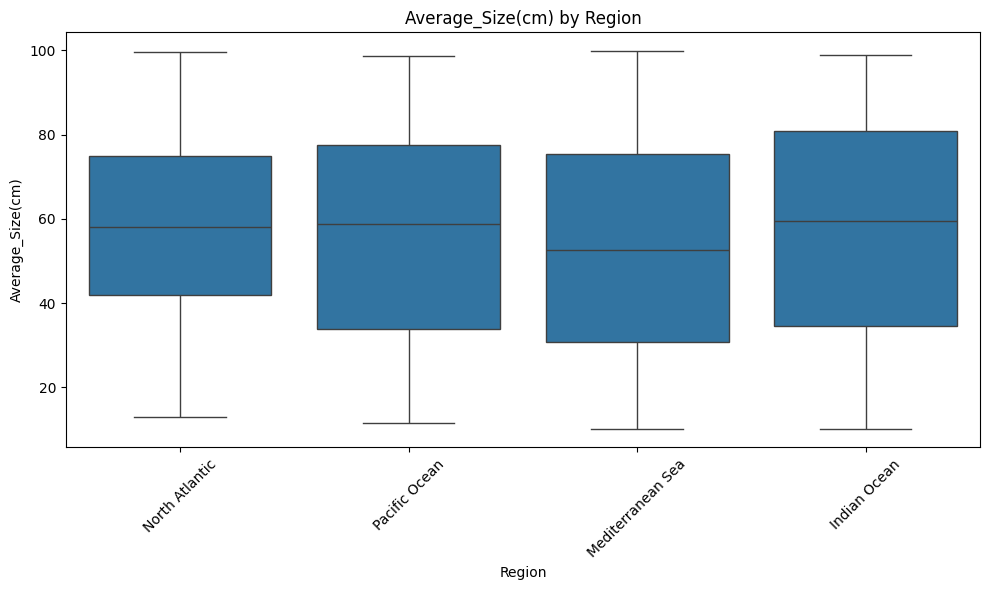


One-way ANOVA results for Average_Size(cm) by Region:
F-statistic: 1.1530
p-value: 0.3272

Analysis 2: Fish Population by Fishing Method


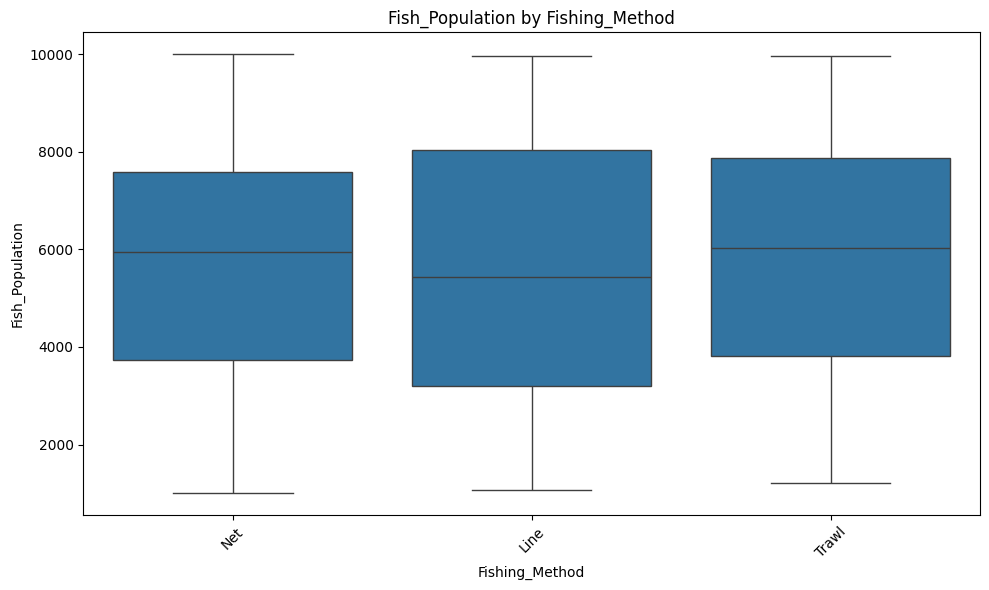


One-way ANOVA results for Fish_Population by Fishing_Method:
F-statistic: 0.7100
p-value: 0.4921


In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Read the csv into a pandas data frame
fish_data = pd.read_csv('../data/raw/Marine_Fish_Data.csv', header=0)

# Function to perform one-way ANOVA
def perform_one_way_anova(df, dependent_var, independent_var):
    """
    Performs one-way ANOVA and creates visualizations
    
    Parameters:
    df: DataFrame
    dependent_var: str (numerical variable to compare)
    independent_var: str (grouping variable)
    """
    # Create boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=independent_var, y=dependent_var, data=df)
    plt.title(f'{dependent_var} by {independent_var}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Perform ANOVA
    groups = [group for name, group in df.groupby(independent_var)[dependent_var]]
    f_statistic, p_value = stats.f_oneway(*groups)
    
    print(f"\nOne-way ANOVA results for {dependent_var} by {independent_var}:")
    print(f"F-statistic: {f_statistic:.4f}")
    print(f"p-value: {p_value:.4f}")
    
    # Perform Tukey's test if ANOVA is significant
    if p_value < 0.05:
        tukey = pairwise_tukeyhsd(df[dependent_var], df[independent_var])
        print("\nTukey's HSD test results:")
        print(tukey)
        
        # Visualize Tukey's results
        plt.figure(figsize=(10, 6))
        tukey.plot_simultaneous()
        plt.tight_layout()
        plt.show()


print("Analysis 1: Fish Size by Region")
perform_one_way_anova(fish_data, 'Average_Size(cm)', 'Region')

print("\nAnalysis 2: Fish Population by Fishing Method")
perform_one_way_anova(fish_data, 'Fish_Population', 'Fishing_Method')